In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
# default_exp eda

# 脑PET图像分析和疾病预测挑战赛
http://challenge.xfyun.cn/topic/info?type=PET

脑PET全称为脑部正电子发射计算机断层显像(brain positron emission tomography PET)，是反映脑部病变的基因、分子、代谢及功能状态的显像。

它是利用正电子核素标记葡萄糖等人体代谢物作为显像剂，通过病灶对显像剂的摄取来反映其代谢变化，从而为临床提供疾病的生物代谢信息，为脑癫痫病、脑肿瘤、帕金森病、阿尔茨海默综合症等提供了有效的检测手段。可利用脑PET图像检测出早期阿尔茨海默综合症病灶，并提前介入治疗，从而延缓发病，对后续患者康复治疗有着积极的意义。因此本赛题以阿尔茨海默综合症为例对脑PET图像进行分析与疾病预测。
## 赛事任务

为研究基于脑PET图像的疾病预测，本次大赛提供了海量脑PET数据集作为脑PET图像检测数据库的训练样本，参赛需根据提供的样本构建模型，对阿尔茨海默综合症进行分析和预测。

脑PET图像检测数据库，记录了老年人受试志愿者的脑PET影像资料，其中50%被确诊为轻度认知障碍（MCI），25%AD患者，25%健康人，以及跟踪调查受试者信息（包括性别和年龄）。

被试按医学诊断分为三类：

C N：健康

MCI：轻度认知障碍

A D：阿尔茨海默综合症
## 赛程
## 数据说明
本次大赛所用脑PET图像检测数据库，图像格式为png。

此次比赛分为初赛和复赛两个阶段，两个阶段的区别是所提供样本的量级有所不同，并且分类任务不同（初赛2分类，复赛3分类），其它的设置均相同。

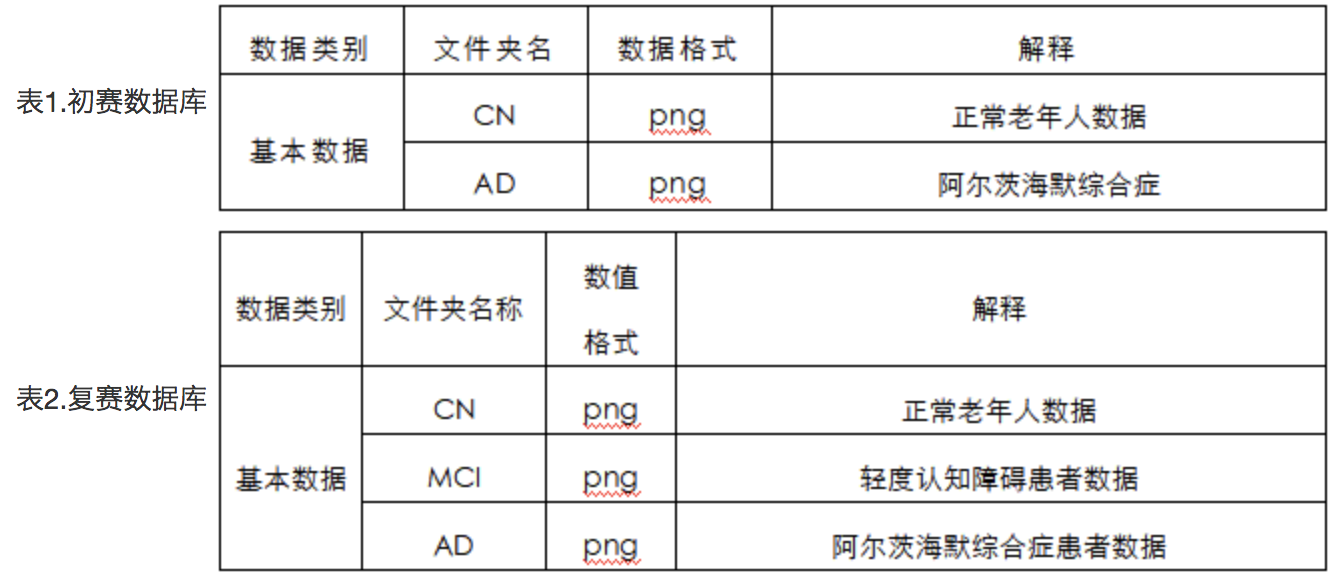

## 提交方式

    文件格式：按照csv格式提交。

    文件大小：无要求。

    提交次数限制：每支团队每天最多提交3次，整个赛期最多30次。

    文件详细说明：

    1) 以csv格式提交，编码为UTF-8，第一行为表头。

2) 提交格式见样例，submit_example.csv。

uuid,label

1,CN

2,CN

## 评估方式
本模型依据提交的结果文件，采用F1-score进行评价。

# 解题思路
## mine
因为给的数据量很少，只能用预训练模型，finetune。当然预训练模型也不用很复杂。

很好的图像练手的比赛！
## 大佬


# lib导入

In [23]:
# export
import os
import glob
from code.config import * 
from loguru import logger
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)  # 设置显示数据的最大列数，防止出现省略号…，导致数据显示不全
pd.set_option('expand_frame_repr', False)  # 当列太多时不自动换行

from sklearn.metrics import classification_report, accuracy_score
import sys
sys.path.append('..')
from mylib.utils.pickle import PickleWrapper

In [24]:

import seaborn as sns
sns.set(font='Arial Unicode MS')  # 解决Seaborn中文显示问题
from mylib.data.processing.eda import describe

In [25]:
args.DATA_DIR

'../../data/contest/20kdxf_pet/'

In [30]:
!ls ../../data/contest/20kdxf_pet/

test  train


In [29]:
!ls ../../data/contest/20kdxf_pet/train

AD CN


In [34]:
!ls ../../data/contest/20kdxf_pet/test

AD&CN


# EDA

In [39]:
train_ad = glob.glob(args.DATA_DIR+'train/AD/*.png')

len(train_ad)

1000

In [40]:
train_cn = glob.glob(args.DATA_DIR+'train/CN/*.png')

len(train_cn)

1000

In [35]:
test_jpg = glob.glob(args.DATA_DIR+'test/*/*.png')

In [36]:
len(test_jpg)

1000